**Research Question 2**

How often is a Q1 fracture associated with an ECTP on the same layer?

## General Process
1. load files
2. Optional: Find pits with properties of interest
3. Create a list of dictionaries of properties of interest
4. Create a dataframe from the list of dictionaries

*Question: In the case of multiple CT and ECT results, which results should be used?*
* Do any tests


* Do any ECTs and CTs have P and Q1 on the same layer?
    If yes, then correlation


* Are ECTP and Q1 failure on the same layer?
* If multiple CTs, are they all the same shear quality?


*STEPS*
1. find pits with ECTP and CT with shear quality results
2. Find tests with failure on the same layer
3. If multiple of either test, select test with lowest fracture character

*FIRST QUESTION*
* Of pits that have ECTP results and CT results with Shear quality. When failure occurs on the same layer, how often (pie chart and/or percentage table) is the fracture character of the CT Q1?








In [19]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from caaml_parser import caaml_parser

In [20]:
# Load xml files

#folder_path = "snowpits_200_MT" # The latest 200 snow pits from MT
folder_path = "snowpits_1K" # latest 1K snowpits from SnowPilot

# Create a list of all CAAML files in the folder
caaml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')] # List of all CAAML files in the folder

In [16]:
# Find pits with CT and ECT results

pits_with_CT_ECT = []

for file in caaml_files:
    file_path = folder_path + '/' + file
    pit = caaml_parser(file_path)

    if len(pit.stabilityTests.CT) > 0 and len(pit.stabilityTests.ECT) > 0:
        pits_with_CT_ECT.append(pit)


print(len(pits_with_CT_ECT)) ## How many pits have CT and ECT results?

349


In [23]:
# ECT and CT results

results_list=[]
results_dict={}

for pit in pits_with_CT_ECT:

    ECTs = pit.stabilityTests.ECT
    CTs = pit.stabilityTests.CT

    for ect in ECTs:
        for ct in CTs: # Every combination of ECT and CT results
            if(ect.depthTop == ct.depthTop and ect.propogation == True): # If failure on the same level and ECT has propogation
                results_dict ={
                    'PitID': pit.pitID,
                    'ECT Score': ect.testScore,
                    'CT Shear Qual': ct.shearQuality
                }
                results_list.append(results_dict)

    

df = pd.DataFrame(results_list)
df.groupby('PitID')

print(df)

df = df.drop_duplicates(subset=['PitID'], keep='first') # Drop duplicates per pit NOTE This keeps the first occurance, update?

print(df)


    PitID ECT Score CT Shear Qual
0   70939    ECTP29            SC
1   71081    ECTP20            SP
2   71083     ECTP4            SC
3   71089     ECTPV            Q2
4   71145     ECTP7            RP
..    ...       ...           ...
80  72314     ECTPV            SP
81  72314     ECTPV            SP
82  72314     ECTPV            SP
83  72314     ECTPV            SP
84  72336    ECTP21            RP

[85 rows x 3 columns]
    PitID ECT Score CT Shear Qual
0   70939    ECTP29            SC
1   71081    ECTP20            SP
2   71083     ECTP4            SC
3   71089     ECTPV            Q2
4   71145     ECTP7            RP
..    ...       ...           ...
74  72276    ECTP12            SP
76  72277    ECTP28            SP
77  72292     ECTP2            SC
78  72314     ECTPV            SP
84  72336    ECTP21            RP

[67 rows x 3 columns]


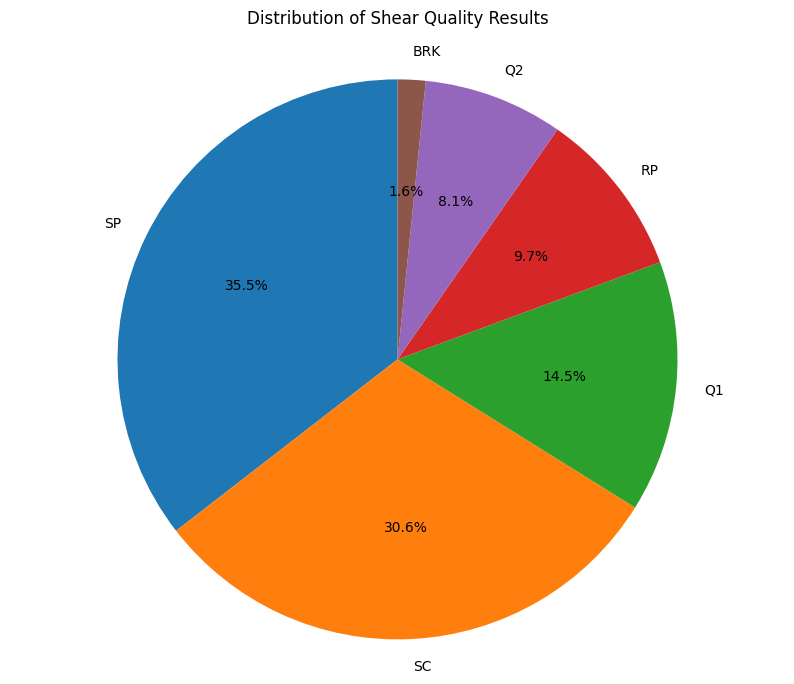


Shear Quality Distribution:
CT Shear Qual
SP     22
SC     19
Q1      9
RP      6
Q2      5
BRK     1
Name: count, dtype: int64

Percentages:
CT Shear Qual
SP     32.8
SC     28.4
Q1     13.4
RP      9.0
Q2      7.5
BRK     1.5
Name: count, dtype: float64


In [22]:
import matplotlib.pyplot as plt

# Calculate value counts for ShearQual
shear_counts = df['CT Shear Qual'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(shear_counts.values, 
        labels=shear_counts.index,
        autopct='%1.1f%%',  # Show percentages with 1 decimal place
        startangle=90)      # Rotate start of pie to 90 degrees

# Add title
plt.title('Distribution of Shear Quality Results', pad=20)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

# Optional: Print the actual counts and percentages
print("\nShear Quality Distribution:")
print(shear_counts)
print("\nPercentages:")
print((shear_counts/len(df['CT Shear Qual'])*100).round(1))